## Dataset Creation after combining all the CSVs for model training

In [1]:
import os

# Check available datasets
print(os.listdir("/kaggle/input"))



['flexural-raw-data1']


In [2]:
import pandas as pd
import os
import re

folder_path = "/kaggle/input/flexural-raw-data1/Abhishek Raw Data"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []

# Robust function to extract pattern, density, and code
def extract_pattern_density_code(filename):
    name = filename.split('.')[0]  # remove extension
    match = re.match(r"([A-Z0-9]+?)(\d+)(\d{1,3})$", name)
    if match:
        pattern = match.group(1)
        density = int(match.group(2))
        code = int(match.group(3))
        return pattern, density, code
    else:
        print(f"Filename did not match expected pattern: {filename}")
        return None, None, None

for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    pattern, density, code = extract_pattern_density_code(file)
    df['Pattern'] = pattern
    df['Density'] = density
    df['Code'] = density*10 + code
    dfs.append(df)

master_df = pd.concat(dfs, ignore_index=True)

print("Master CSV created successfully!")
print(master_df.head())


Master CSV created successfully!
      Time Flexure extension Flexure load Flexure strain Flexure stress  \
0    (sec)              (mm)          (N)            (%)          (MPa)   
1  0.00000           0.00000      0.01663        0.00000        0.00998   
2  0.05000           0.00000      0.02967        0.00000        0.01780   
3  0.10000           0.00000      0.01669        0.00000        0.01001   
4  0.15000           0.00031      0.05049        0.00018        0.03029   

  Extension      Load Pattern  Density  Code  
0      (mm)       (N)     TRI       80   802  
1   0.00000  -0.01663     TRI       80   802  
2   0.00000  -0.02967     TRI       80   802  
3   0.00000  -0.01669     TRI       80   802  
4  -0.00031  -0.05049     TRI       80   802  


In [3]:
master_df.shape

(2027904, 10)

In [4]:
master_df.head(10)

,Time,Flexure extension,Flexure load,Flexure strain,Flexure stress,Extension,Load,Pattern,Density,Code
0,(sec),(mm),(N),(%),(MPa),(mm),(N),TRI,80,802
1,0.00000,0.00000,0.01663,0.00000,0.00998,0.00000,-0.01663,TRI,80,802
2,0.05000,0.00000,0.02967,0.00000,0.01780,0.00000,-0.02967,TRI,80,802
3,0.10000,0.00000,0.01669,0.00000,0.01001,0.00000,-0.01669,TRI,80,802
4,0.15000,0.00031,0.05049,0.00018,0.03029,-0.00031,-0.05049,TRI,80,802
5,0.20000,0.00047,0.06700,0.00027,0.04020,-0.00047,-0.06700,TRI,80,802
6,0.25000,0.00187,0.05096,0.00110,0.03057,-0.00187,-0.05096,TRI,80,802
7,0.30000,0.00328,0.03393,0.00192,0.02036,-0.00328,-0.03393,TRI,80,802
8,0.35000,0.00516,0.04957,0.00302,0.02974,-0.00516,-0.04957,TRI,80,802
9,0.40000,0.00734,0.05833,0.00430,0.03500,-0.00734,-0.05833,TRI,80,802


In [5]:
master_df['Density'].unique()  # Shows all unique densities

array([ 80, 100,  40,  20,  60])

In [6]:
master_df['Pattern'].unique()  # Shows all unique densities

array(['TRI', 'OCT', 'LIG', 'CON', 'GRI', 'LIN', 'C3D', 'CSD', 'QCU',
       'CRS', 'ZZG', 'THX', 'CUB', 'GYR'], dtype=object)

In [7]:
master_df['Code'].unique()

array([ 802, 1001, 1003,  402,  201,  803,  801,  202,  203,  603,  601,
       1002,  403,  602,  401])

In [8]:

import pandas as pd

# Assuming master_df is your dataframe
units_pattern = ['(sec)', '(mm)', '(N)', '(%)', '(MPa)', '(mm)', '(N)']

# Identify rows containing all the unit values
matching_rows = master_df.apply(lambda row: all(item in row.values for item in units_pattern), axis=1)

# Get the indices of these rows
row_indices = master_df.index[matching_rows].tolist()
print("Row indices containing units:", row_indices)

# Optionally, print the first few matching rows
print("\nSome matching rows:")
print(master_df.loc[row_indices].head())

Row indices containing units: [0, 9668, 20318, 30332, 40040, 49837, 59627, 66874, 76546, 86182, 96060, 107345, 121478, 128721, 140013, 147235, 158219, 175072, 184776, 192812, 202681, 212314, 220429, 230074, 239747, 247860, 259058, 270715, 280350, 290104, 299733, 308090, 318526, 328484, 338925, 346961, 359109, 368923, 379389, 389114, 398819, 408709, 418540, 428407, 436456, 446113, 455795, 465508, 477637, 487452, 497947, 505185, 513210, 523059, 534407, 542508, 553003, 562824, 572554, 583066, 592734, 600772, 610523, 621765, 631567, 641275, 650915, 659000, 669521, 677545, 688804, 700096, 707541, 718253, 727297, 737636, 745721, 755368, 765139, 775611, 785287, 794925, 805388, 813461, 824291, 832325, 843580, 851842, 861383, 872649, 882341, 893673, 904120, 914189, 922316, 930364, 937591, 944853, 961676, 971391, 981041, 989224, 999015, 1008684, 1018359, 1028898, 1038569, 1048348, 1058000, 1067866, 1077681, 1088179, 1095430, 1102652, 1112293, 1119531, 1130774, 1140425, 1147662, 1154724, 1162778,

In [9]:
master_df.loc[9668]    # by index label

Time                 (sec)
Flexure extension     (mm)
Flexure load           (N)
Flexure strain         (%)
Flexure stress       (MPa)
Extension             (mm)
Load                   (N)
Pattern                OCT
Density                 80
Code                   802
Name: 9668, dtype: object

In [10]:
master_df.shape

(2027904, 10)

In [11]:
import pandas as pd

# Define the units pattern
units_pattern = ['(sec)', '(mm)', '(N)', '(%)', '(MPa)', '(mm)', '(N)']

# Identify rows containing all unit values
matching_rows = master_df.apply(lambda row: all(item in row.values for item in units_pattern), axis=1)

# Drop these rows
df = master_df[~matching_rows].reset_index(drop=True)

print("Rows containing units have been removed. New dataframe shape:", df.shape)


Rows containing units have been removed. New dataframe shape: (2027694, 10)


In [12]:
df.head(10)

,Time,Flexure extension,Flexure load,Flexure strain,Flexure stress,Extension,Load,Pattern,Density,Code
0,0.00000,0.00000,0.01663,0.00000,0.00998,0.00000,-0.01663,TRI,80,802
1,0.05000,0.00000,0.02967,0.00000,0.01780,0.00000,-0.02967,TRI,80,802
2,0.10000,0.00000,0.01669,0.00000,0.01001,0.00000,-0.01669,TRI,80,802
3,0.15000,0.00031,0.05049,0.00018,0.03029,-0.00031,-0.05049,TRI,80,802
4,0.20000,0.00047,0.06700,0.00027,0.04020,-0.00047,-0.06700,TRI,80,802
5,0.25000,0.00187,0.05096,0.00110,0.03057,-0.00187,-0.05096,TRI,80,802
6,0.30000,0.00328,0.03393,0.00192,0.02036,-0.00328,-0.03393,TRI,80,802
7,0.35000,0.00516,0.04957,0.00302,0.02974,-0.00516,-0.04957,TRI,80,802
8,0.40000,0.00734,0.05833,0.00430,0.03500,-0.00734,-0.05833,TRI,80,802
9,0.45000,0.00953,0.08730,0.00558,0.05238,-0.00953,-0.08730,TRI,80,802


In [13]:
# Example: drop the column named 'Extension'
df = df.drop(columns=['Time'])

# Verify
print(df.head())

  Flexure extension Flexure load Flexure strain Flexure stress Extension  \
0           0.00000      0.01663        0.00000        0.00998   0.00000   
1           0.00000      0.02967        0.00000        0.01780   0.00000   
2           0.00000      0.01669        0.00000        0.01001   0.00000   
3           0.00031      0.05049        0.00018        0.03029  -0.00031   
4           0.00047      0.06700        0.00027        0.04020  -0.00047   

       Load Pattern  Density  Code  
0  -0.01663     TRI       80   802  
1  -0.02967     TRI       80   802  
2  -0.01669     TRI       80   802  
3  -0.05049     TRI       80   802  
4  -0.06700     TRI       80   802  


In [14]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
df

,Flexure extension,Flexure load,Flexure strain,Flexure stress,Extension,Load,Pattern,Density,Code
0,5.09750,87.61620,2.98682,52.56971,-5.09750,-87.61619,CUB,80,802
1,20.62094,94.02350,12.08258,56.41410,-20.62094,-94.02350,CUB,100,1003
2,2.57016,44.17989,1.50595,26.50793,-2.57016,-44.17988,OCT,100,1003
3,10.31719,72.81451,6.04523,43.68870,-10.31719,-72.81451,QCU,20,201
4,3.91109,55.16191,2.29166,33.09715,-3.91109,-55.16191,LIN,60,601
...,...,...,...,...,...,...,...,...,...
2027689,0.18234,0.04409,0.10684,0.02646,-0.18234,-0.04409,LIN,60,602
2027690,9.14500,71.02377,5.35840,42.61426,-9.14500,-71.02377,CUB,20,202
2027691,4.03016,57.97430,2.36142,34.78458,-4.03016,-57.97430,ZZG,60,603
2027692,2.12766,34.03754,1.24667,20.42252,-2.12766,-34.03754,CUB,40,403


## Data Pre-Processing

### Conversion to float64

In [16]:
categorical_cols = ['Pattern']

for col in df.columns:
    if col not in categorical_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
print(df.dtypes)

Flexure extension    float64
Flexure load         float64
Flexure strain       float64
Flexure stress       float64
Extension            float64
Load                 float64
Pattern               object
Density              float64
Code                 float64
dtype: object


### Checking for null values

In [17]:
df.isna().sum()

Flexure extension    0
Flexure load         0
Flexure strain       0
Flexure stress       0
Extension            0
Load                 0
Pattern              0
Density              0
Code                 0
dtype: int64

In [18]:
df.nunique()

Flexure extension      86892
Flexure load         1720570
Flexure strain         86892
Flexure stress       1612720
Extension              86892
Load                 1746135
Pattern                   14
Density                    5
Code                      15
dtype: int64

### Outlier detection

In [19]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outlier_counts = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Condition for outliers
    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    
    total_entries = df[col].notna().sum()  # Count non-null entries
    count_outliers = outliers.sum()
    percentage_outliers = (count_outliers / total_entries) * 100
    
    outlier_counts.append([col, count_outliers, total_entries, percentage_outliers])

# Create DataFrame
outlier_counts_df = pd.DataFrame(outlier_counts, 
                                 columns=['Column', 'Outlier Count', 'Total Entries', 'Outlier %'])

print(outlier_counts_df)


              Column  Outlier Count  Total Entries  Outlier %
0  Flexure extension           7274        2027694   0.358733
1       Flexure load              0        2027694   0.000000
2     Flexure strain           7274        2027694   0.358733
3     Flexure stress              0        2027694   0.000000
4          Extension           7274        2027694   0.358733
5               Load              0        2027694   0.000000
6            Density              0        2027694   0.000000
7               Code              0        2027694   0.000000


### Printing some of the outlier rows

In [20]:
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boolean mask for rows that have outliers in any numeric column
outlier_mask = pd.Series(False, index=df.index)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    col_outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outlier_mask = outlier_mask | col_outliers  # Combine masks

# Filter rows with outliers
outlier_rows = df[outlier_mask]

# Show some of them
print(outlier_rows.head(-10))  # first 20 rows with outliers


         Flexure extension  Flexure load  Flexure strain  Flexure stress  \
1                 20.62094      94.02350        12.08258        56.41410   
233               18.31375      95.16389        10.73071        57.09834   
542               20.13844      96.47004        11.79987        57.88203   
749               18.35250      95.09222        10.75342        57.05534   
1311              20.54766      94.21602        12.03964        56.52961   
...                    ...           ...             ...             ...   
2023580           19.52250      94.83686        11.43897        56.90211   
2023624           20.38266      92.53709        11.94296        55.52225   
2023659           19.77500      96.98416        11.58691        58.19050   
2023929           21.00375      94.54594        12.30689        56.72757   
2024279           19.75250      93.30643        11.57373        55.98386   

         Extension      Load Pattern  Density    Code  
1        -20.62094 -94.02350   

In [21]:
outlier_rows.shape

(7274, 9)

In [22]:
import numpy as np

df_cleaned = df.copy()

# 2. Identify all numeric columns
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

print("Analyzing and Capping Outliers...")
print("-" * 40)

# 3. Iterate through each numeric column to find and cap outliers
for col in numeric_cols:
    # Calculate Q1, Q3, and IQR from the original distribution for consistency
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier condition
    outlier_condition = (df_cleaned[col] < (Q1 - 1.5 * IQR)) | (df_cleaned[col] > (Q3 + 1.5 * IQR))
    
    # Calculate the percentage of outliers
    percentage_outliers = outlier_condition.sum() / len(df_cleaned) * 100
    
    print(f"Column '{col}': {percentage_outliers:.2f}% outliers")

    # 4. Check if the outlier percentage is between 0% and 5%
    if 0 < percentage_outliers < 5:
        print(f"-> Capping outliers in '{col}'.")
        # Define the upper and lower fences
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        
        # Cap the outliers in the cleaned dataframe
        # Replace values below the lower fence with the lower_fence value
        df_cleaned.loc[df_cleaned[col] < lower_fence, col] = lower_fence
        # Replace values above the upper fence with the upper_fence value
        df_cleaned.loc[df_cleaned[col] > upper_fence, col] = upper_fence
        
    else:
        print(f"-> Skipping '{col}' (outlier % is 0 or >= 5%).")
    print("-" * 40)



Analyzing and Capping Outliers...
----------------------------------------
Column 'Flexure extension': 0.36% outliers
-> Capping outliers in 'Flexure extension'.
----------------------------------------
Column 'Flexure load': 0.00% outliers
-> Skipping 'Flexure load' (outlier % is 0 or >= 5%).
----------------------------------------
Column 'Flexure strain': 0.36% outliers
-> Capping outliers in 'Flexure strain'.
----------------------------------------
Column 'Flexure stress': 0.00% outliers
-> Skipping 'Flexure stress' (outlier % is 0 or >= 5%).
----------------------------------------
Column 'Extension': 0.36% outliers
-> Capping outliers in 'Extension'.
----------------------------------------
Column 'Load': 0.00% outliers
-> Skipping 'Load' (outlier % is 0 or >= 5%).
----------------------------------------
Column 'Density': 0.00% outliers
-> Skipping 'Density' (outlier % is 0 or >= 5%).
----------------------------------------
Column 'Code': 0.00% outliers
-> Skipping 'Code' (out

In [23]:

# --- Verification ---
print("\n" + "="*40)
print("Verifying outliers on the cleaned DataFrame (df_cleaned)...")
print("="*40)

# Re-run the outlier analysis on the cleaned data
outlier_counts = []
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = (df_cleaned[col] < (Q1 - 1.5 * IQR)) | (df_cleaned[col] > (Q3 + 1.5 * IQR))
    count_outliers = outliers.sum()
    total_entries = df_cleaned[col].notna().sum()
    percentage_outliers = (count_outliers / total_entries) * 100 if total_entries > 0 else 0
    
    outlier_counts.append([col, count_outliers, total_entries, percentage_outliers])

outlier_counts_df = pd.DataFrame(outlier_counts, 
                                 columns=['Column', 'Outlier Count', 'Total Entries', 'Outlier %'])

print("Number of rows is unchanged.")
print(f"Original shape: {df.shape}")
print(f"New shape:      {df_cleaned.shape}\n")
print("Outlier analysis after capping:")
print(outlier_counts_df)



Verifying outliers on the cleaned DataFrame (df_cleaned)...
Number of rows is unchanged.
Original shape: (2027694, 9)
New shape:      (2027694, 9)

Outlier analysis after capping:
              Column  Outlier Count  Total Entries  Outlier %
0  Flexure extension              0        2027694        0.0
1       Flexure load              0        2027694        0.0
2     Flexure strain              0        2027694        0.0
3     Flexure stress              0        2027694        0.0
4          Extension              0        2027694        0.0
5               Load              0        2027694        0.0
6            Density              0        2027694        0.0
7               Code              0        2027694        0.0


In [24]:
df_cleaned

,Flexure extension,Flexure load,Flexure strain,Flexure stress,Extension,Load,Pattern,Density,Code
0,5.097500,87.61620,2.986820,52.56971,-5.097500,-87.61619,CUB,80.0,802.0
1,18.122604,94.02350,10.618696,56.41410,-18.122604,-94.02350,CUB,100.0,1003.0
2,2.570160,44.17989,1.505950,26.50793,-2.570160,-44.17988,OCT,100.0,1003.0
3,10.317190,72.81451,6.045230,43.68870,-10.317190,-72.81451,QCU,20.0,201.0
4,3.911090,55.16191,2.291660,33.09715,-3.911090,-55.16191,LIN,60.0,601.0
...,...,...,...,...,...,...,...,...,...
2027689,0.182340,0.04409,0.106840,0.02646,-0.182340,-0.04409,LIN,60.0,602.0
2027690,9.145000,71.02377,5.358400,42.61426,-9.145000,-71.02377,CUB,20.0,202.0
2027691,4.030160,57.97430,2.361420,34.78458,-4.030160,-57.97430,ZZG,60.0,603.0
2027692,2.127660,34.03754,1.246670,20.42252,-2.127660,-34.03754,CUB,40.0,403.0


In [25]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Example: custom features
# columns_array = [
#     "Flexure extension",
#     "Flexure load",
#     "Flexure strain",
#     "Flexure stress",
#     "Extension",
#     "Load",
#     "Density",
#     # "Code"
# ] # change to your actual feature names
# class_column = 'Pattern'           # change to your actual class column name

# # Get unique class labels
# classes = df_cleaned[class_column].unique()

# # Dictionary to store correlations for each class
# correlation_results = {}

# for cls in classes:
#     # Filter for current class
#     df_class = df_cleaned[df_cleaned[class_column] == cls]
    
#     # Select only the custom features
#     subset = df_class[columns_array]
    
#     # Compute correlation matrix
#     corr_matrix = subset.corr()
    
#     # Store in dictionary
#     correlation_results[cls] = corr_matrix
    
#     # Optional: Show heatmap
#     plt.figure(figsize=(16, 9))
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#     plt.title(f'Heatmap for {cls} Pattern')
#     plt.show()


In [26]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Example: custom features
# columns_array = [
#     "Flexure extension",
#     "Flexure load",
#     "Flexure strain",
#     "Flexure stress",
#     "Extension",
#     "Load"
#     # "Density",
#     # "Code"
# ] # change to your actual feature names
# class_column = 'Density'           # change to your actual class column name

# # Get unique class labels
# classes = df_cleaned[class_column].unique()

# # Dictionary to store correlations for each class
# correlation_results = {}

# for cls in classes:
#     # Filter for current class
#     df_class = df_cleaned[df_cleaned[class_column] == cls]
    
#     # Select only the custom features
#     subset = df_class[columns_array]
    
#     # Compute correlation matrix
#     corr_matrix = subset.corr()
    
#     # Store in dictionary
#     correlation_results[cls] = corr_matrix
    
#     # Optional: Show heatmap
#     plt.figure(figsize=(16, 9))
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#     plt.title(f'Heatmap for {cls} Pattern')
#     plt.show()


Correlation with target column:
Flexure strain       0.082730
Flexure extension    0.082730
Flexure stress       0.049321
Flexure load         0.049321
Density             -0.032860
Load                -0.049321
Extension           -0.082730
Name: Pattern, dtype: float64


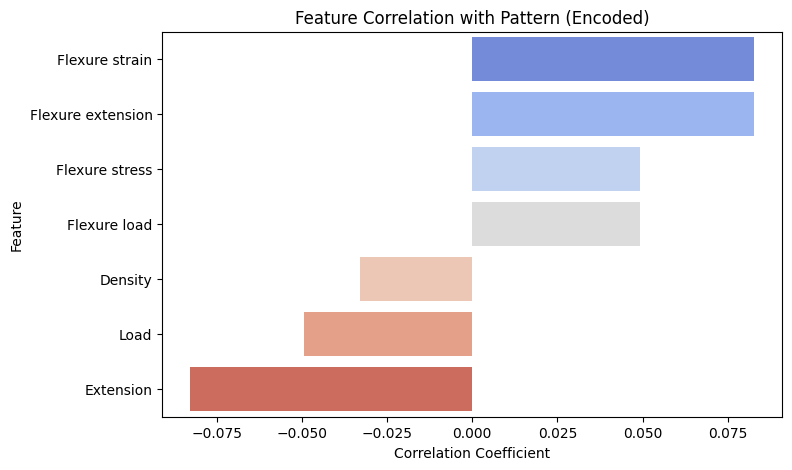

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your custom feature columns
columns_array = [
    "Flexure extension",
    "Flexure load",
    "Flexure strain",
    "Flexure stress",
    "Extension",
    "Load",
    "Density"
]

target_col = "Pattern"  # categorical target

# Encode the target
df_encoded = df_cleaned.copy()
df_encoded[target_col] = df_encoded[target_col].astype('category').cat.codes

# Select only feature columns + target
subset = df_encoded[columns_array + [target_col]]

# Compute correlation with respect to target
corr_with_target = subset.corr()[target_col].drop(target_col).sort_values(ascending=False)

print("Correlation with target column:")
print(corr_with_target)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
plt.title(f'Feature Correlation with {target_col} (Encoded)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


ANOVA F-scores:
Load                 3622.442966
Flexure load         3622.442963
Flexure stress       3622.442960
Flexure extension    3611.221320
Extension            3611.221310
Flexure strain       3611.220214
Density               750.799233
dtype: float64


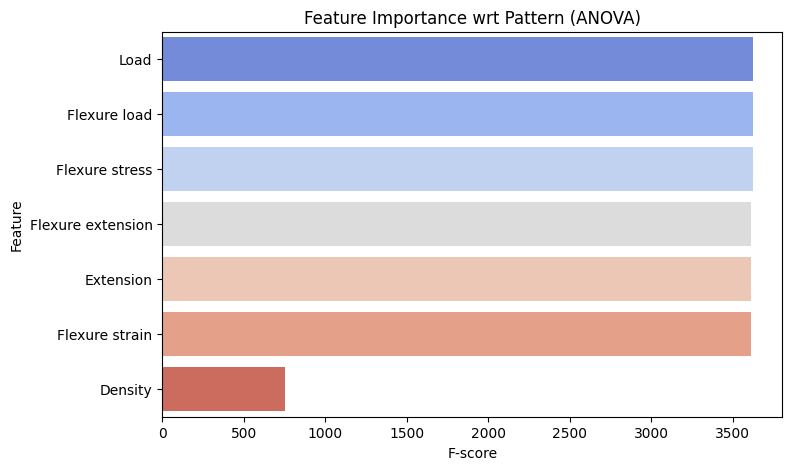

In [29]:
from sklearn.feature_selection import f_classif, mutual_info_classif

X = df_cleaned[columns_array]
y = df_cleaned[target_col]

# ANOVA F-test
f_scores, _ = f_classif(X, y)
anova_df = pd.Series(f_scores, index=columns_array).sort_values(ascending=False)

print("ANOVA F-scores:")
print(anova_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=anova_df.values, y=anova_df.index, palette='coolwarm')
plt.title(f'Feature Importance wrt {target_col} (ANOVA)')
plt.xlabel('F-score')
plt.ylabel('Feature')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your custom feature columns
columns_array = [
    "Flexure extension",
    "Flexure load",
    "Flexure strain",
    "Flexure stress",
    "Extension",
    "Load",
    "Density"
]

# Select only those columns from the DataFrame
subset = df_cleaned[columns_array]

# Print the correlation matrix
print("Correlation matrix:")
print(corr_matrix)


# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Features')
plt.show()


In [ ]:
df_cleaned.drop('Code', axis=1, inplace=True)

In [ ]:
null_counts = df_cleaned.isnull().sum()

In [ ]:
null_counts

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Optional: better plot style
sns.set(style="whitegrid")

# Create mother folder and subfolders
mother_folder = "plots"
hist_folder = os.path.join(mother_folder, "histograms")
count_folder = os.path.join(mother_folder, "count_plots")
box_folder = os.path.join(mother_folder, "box_plots")

os.makedirs(hist_folder, exist_ok=True)
os.makedirs(count_folder, exist_ok=True)
os.makedirs(box_folder, exist_ok=True)

numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# 1. Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], bins=20, kde=False, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(os.path.join(hist_folder, f"{col}_histogram.png"), bbox_inches='tight')
    plt.close()

# 2. Count plot of Pattern
plt.figure(figsize=(8, 5))
sns.countplot(x='Pattern', data=df_cleaned, palette='Set2')
plt.title("Count of Each Pattern")
plt.savefig(os.path.join(count_folder, "pattern_count_plot.png"), bbox_inches='tight')
plt.close()

# 3. Box plots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Pattern', y=col, data=df_cleaned, palette='Set3')
    plt.title(f"{col} vs Pattern")
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(box_folder, f"{col}_boxplot.png"), bbox_inches='tight')
    plt.close()

# 4. Zip the mother folder
shutil.make_archive("plots", 'zip', mother_folder)

print("✅ All plots saved in 'plots/' and zipped as 'plots.zip'")


## Model Training

In [ ]:
df_cleaned

In [ ]:
numeric_cols = [
    "Flexure extension",
    "Flexure load",
    "Flexure strain",
    "Flexure stress",
    "Extension",
    "Load",
    "Density"
]

In [ ]:
df_train=df_cleaned.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['Pattern'] = le.fit_transform(df_cleaned['Pattern'])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

In [ ]:
df_cleaned

In [ ]:
df_cleaned.drop('Code', axis=1, inplace=True)

In [ ]:
df_cleaned

In [ ]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop('Pattern', axis=1)
y = df_cleaned['Pattern']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## feature engineering for better results

In [ ]:
df_cleaned1=df_cleaned.copy()

In [ ]:
df_cleaned1

In [ ]:
## Applying PCA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Features for PCA
flexure_features = ['Flexure extension', 'Flexure load', 'Flexure strain', 'Flexure stress', "Extension", "Load", "Density"]

# 1. Standardize the features
scaler = StandardScaler()
flexure_scaled = scaler.fit_transform(df_cleaned1[flexure_features])

# 2. Apply PCA
pca = PCA(n_components=4)
flexure_pca = pca.fit_transform(flexure_scaled)

# 3. Convert PCA output to a DataFrame
pca_columns = ['Flexure_PC1', 'Flexure_PC2', 'Flexure_PC3', 'Flexure_PC4']
flexure_pca_df = pd.DataFrame(flexure_pca, columns=pca_columns, index=df_cleaned1.index)  # <-- add index to align

# 4. Concatenate with the original DataFrame (dropping original Flexure features)
df_cleaned1 = pd.concat([df_cleaned1.drop(columns=flexure_features), flexure_pca_df], axis=1)

# Optional: check explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each PC:", explained_variance)
print("Total variance captured by 4 PCs:", explained_variance.sum())
